<a href="https://colab.research.google.com/github/NikhilDPujari/Machine-Learning/blob/main/EDA_Travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [5]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [8]:
df.replace('Fe Male', "Female", inplace=True)

In [9]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df.replace({"Male":1, "Female":0}, inplace=True)

In [11]:
df.Gender.unique()

array([0, 1])

In [12]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.shape

(4128, 20)

In [15]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

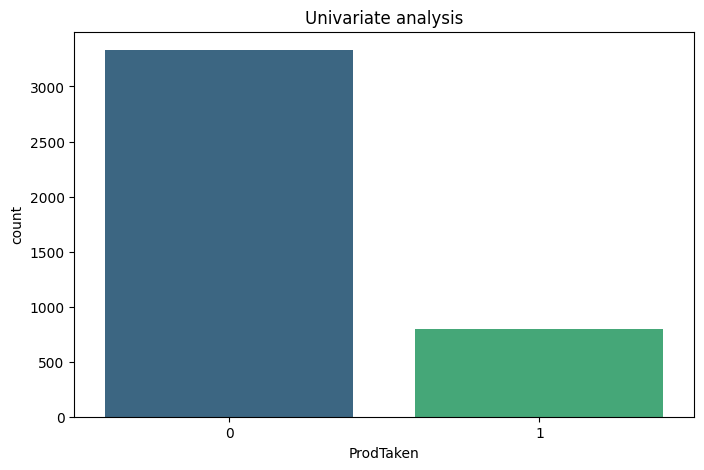

In [16]:
# univariate analysis for categorical column
plt.figure(figsize=(8,5))
sns.countplot(x='ProdTaken', data=df, palette='viridis')
plt.title('Univariate analysis')
plt.show()

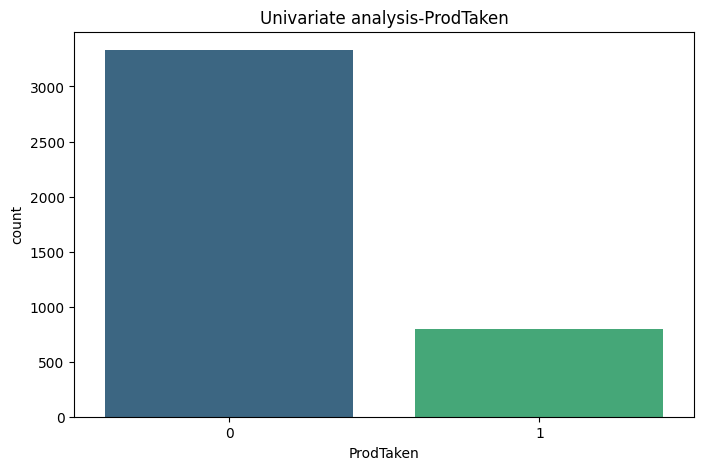

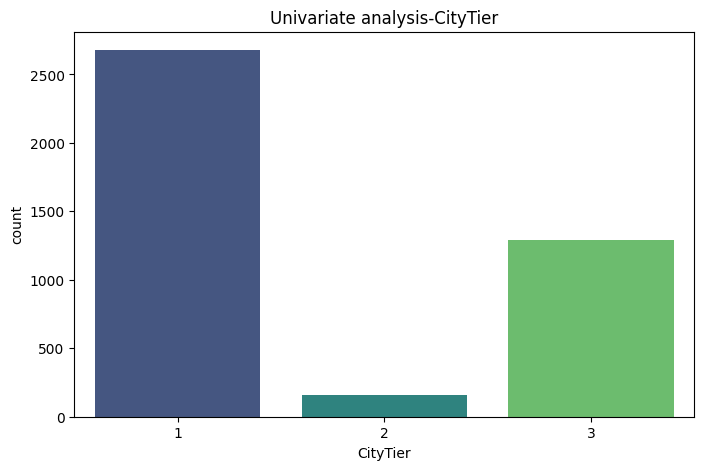

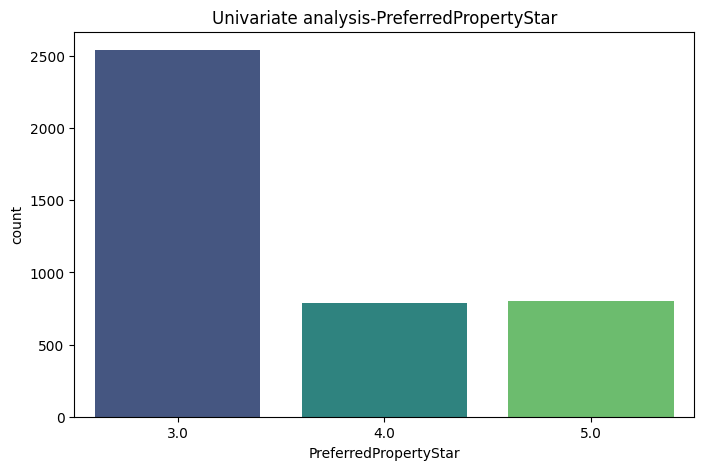

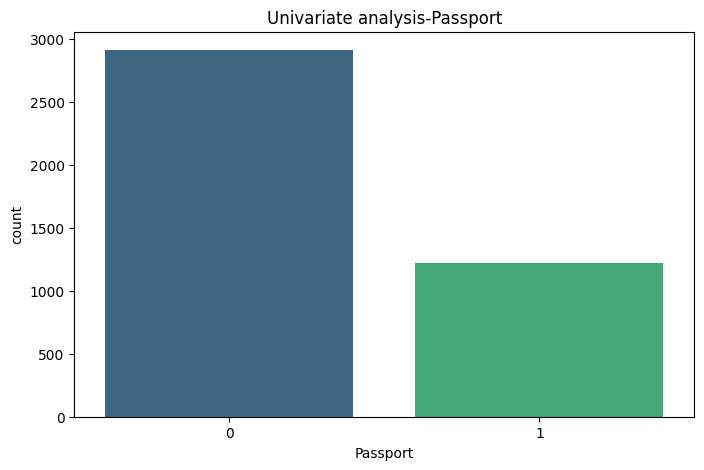

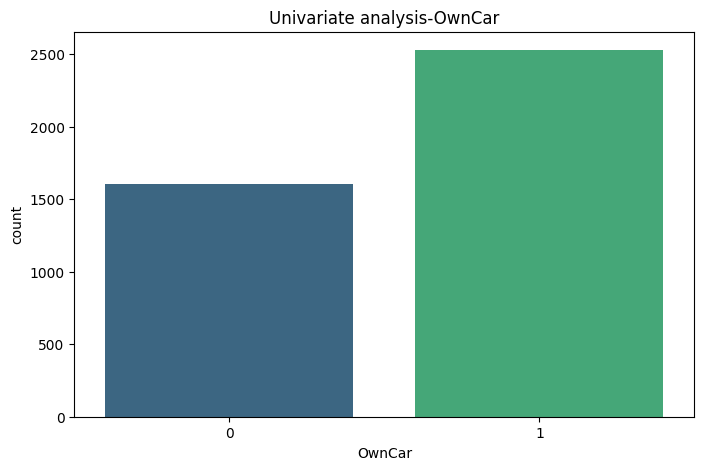

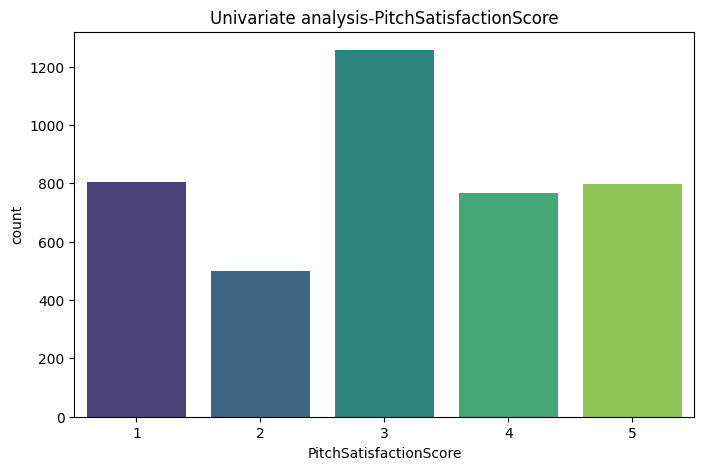

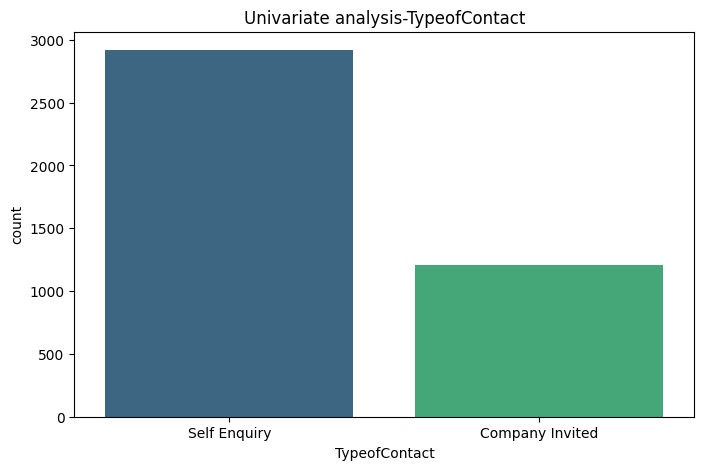

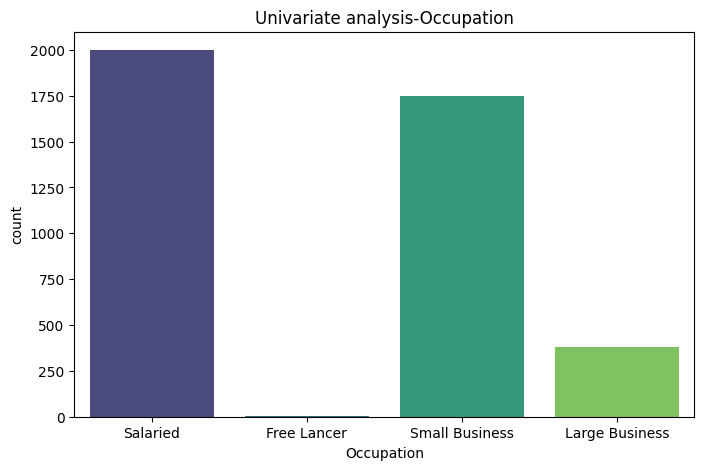

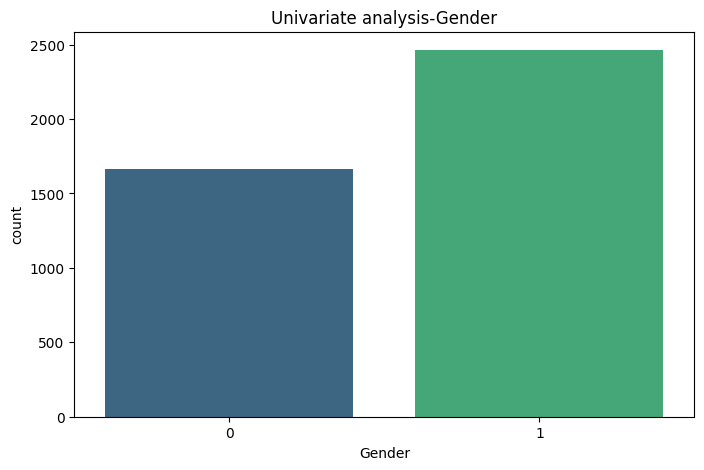

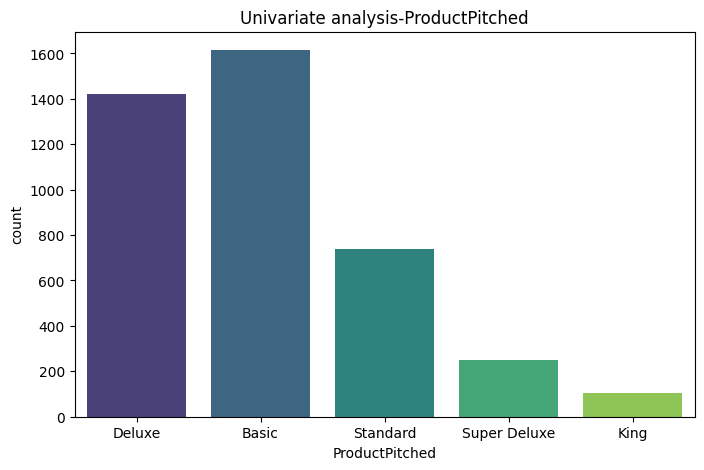

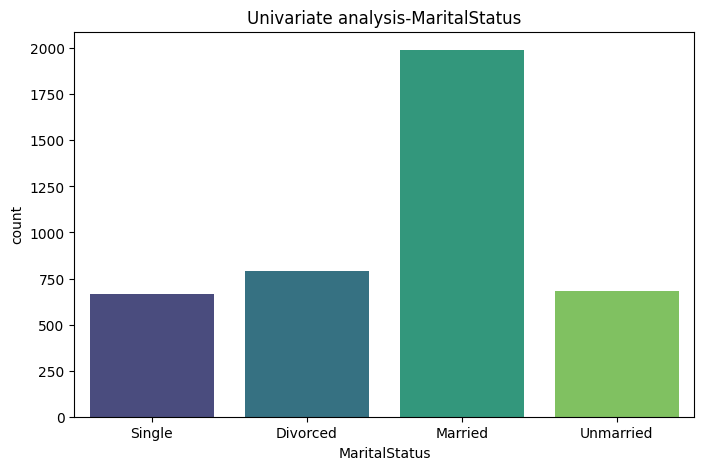

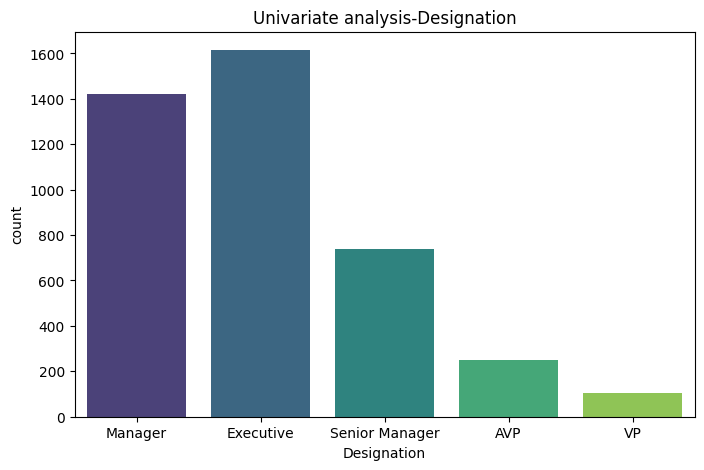

In [17]:
for cat_columns in cats:
  plt.figure(figsize=(8,5))
  sns.countplot(x=cat_columns, data=df, palette='viridis')
  plt.title(f"Univariate analysis-{cat_columns}")
  plt.show()

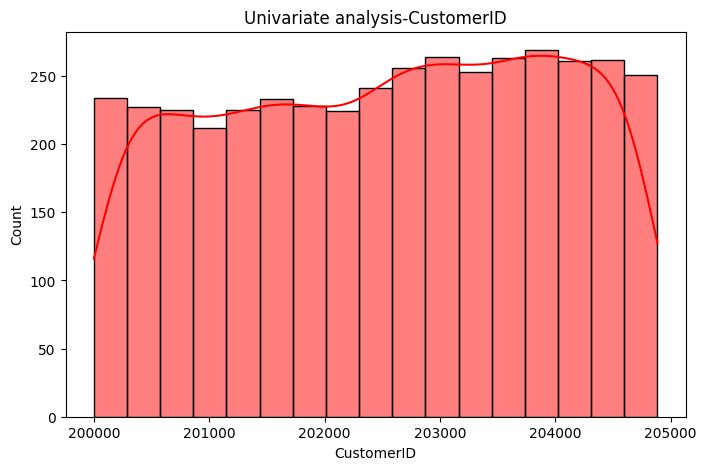

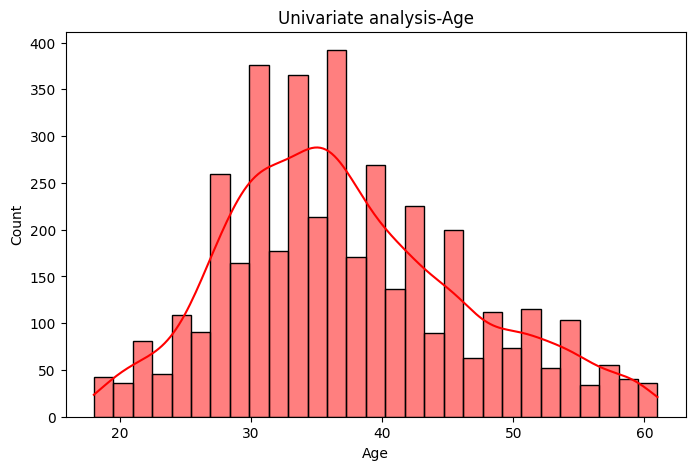

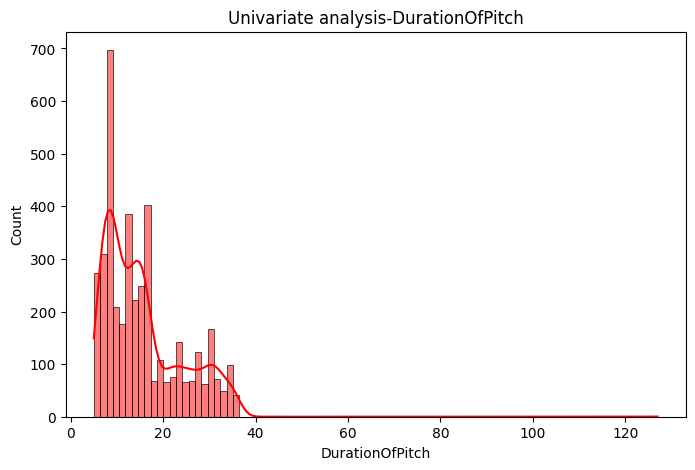

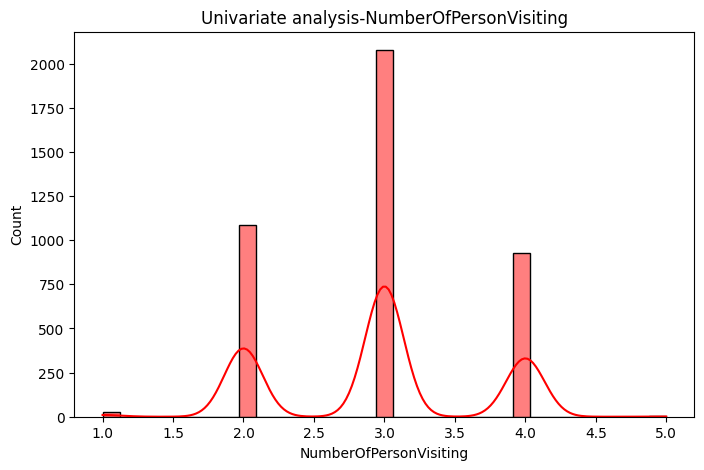

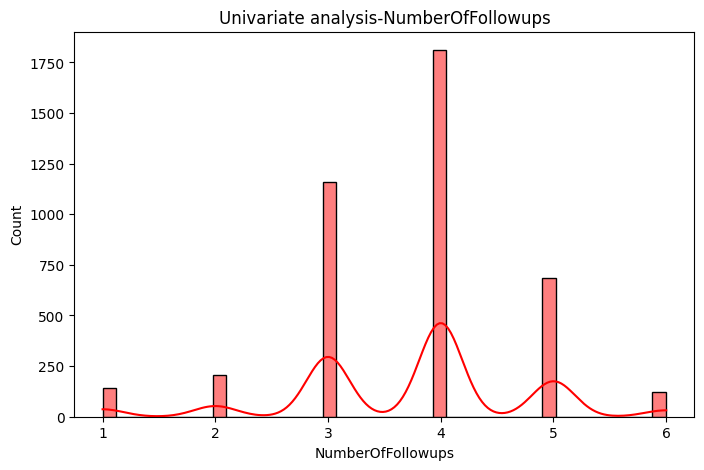

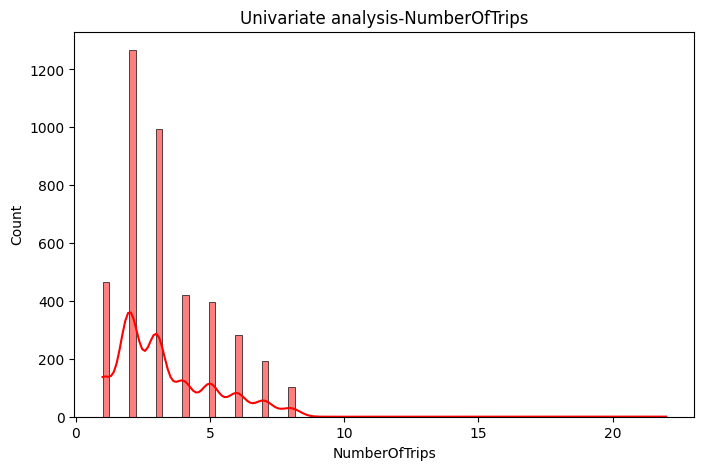

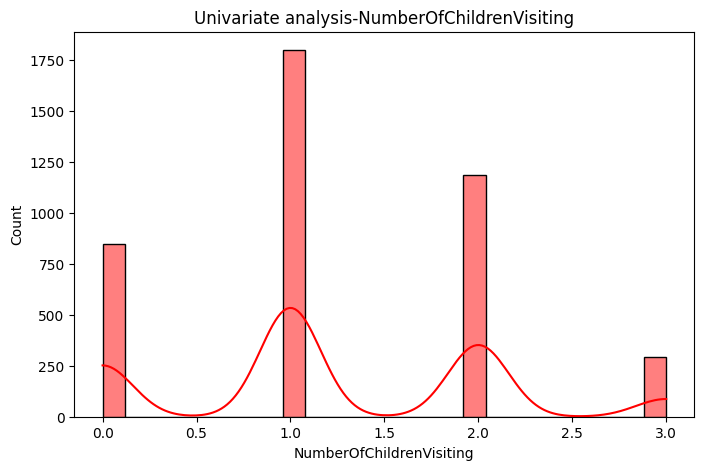

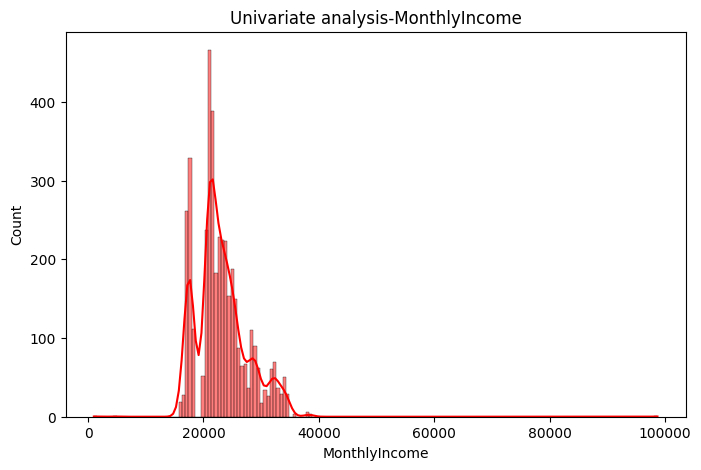

In [18]:
# univariate analysis for numerical columns
for num_columns in nums:
  plt.figure(figsize=(8,5))
  sns.histplot(df[num_columns], kde=True, color='red')
  plt.title(f"Univariate analysis-{num_columns}")
  plt.show()

<Axes: xlabel='TypeofContact', ylabel='count'>

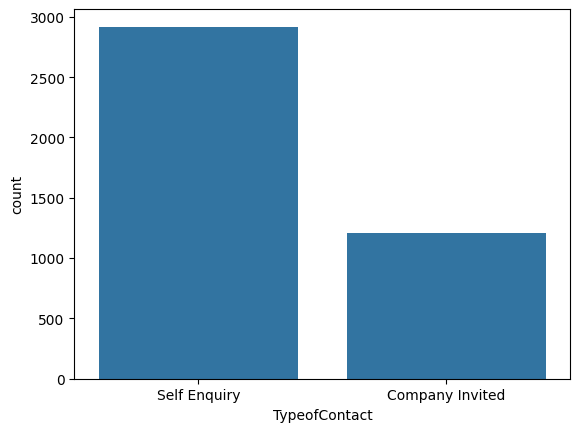

In [19]:
sns.countplot(x='TypeofContact', data=df)

In [20]:
cats

['ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'OwnCar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [21]:
df.CityTier.unique()

array([3, 1, 2])

In [22]:
df.CityTier.describe()

,CityTier
count,4128.000000
mean,1.663275
std,0.920640
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,3.000000


In [23]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.00,22418.0,25301.00,98678.0


In [24]:
df[cats].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0
Gender,4128.0,0.596657,0.490628,0.0,0.0,1.0,1.0,1.0


In [25]:
#All of the columns above are discrete but in terms of business mean values
#of above column doesn't make sense
#So these columns are to be treated as a categorical column
#To treat these columns as categorical column, we will convert them to objet
df[cats] = df[cats].astype('object')

In [26]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,1,2463
ProductPitched,4128,5,Basic,1615


In [27]:
for i in df[cats].columns:
  x=df[i].unique()
  print(f"{i}:{x}")
  print()

ProdTaken:[1 0]

CityTier:[3 1 2]

PreferredPropertyStar:[3.0 4.0 5.0]

Passport:[1 0]

OwnCar:[1 0]

PitchSatisfactionScore:[2 3 5 4 1]

TypeofContact:['Self Enquiry' 'Company Invited']

Occupation:['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender:[0 1]

ProductPitched:['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus:['Single' 'Divorced' 'Married' 'Unmarried']

Designation:['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



In [28]:
# bivariate analysis
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='DurationOfPitch'>

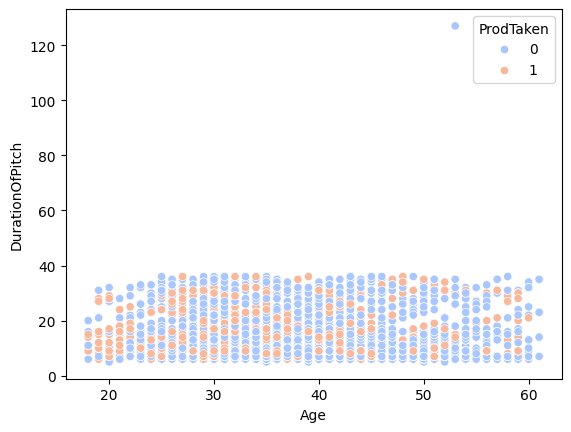

In [29]:
sns.scatterplot(x='Age', y='DurationOfPitch', data=df, hue='ProdTaken', palette='coolwarm')

In [30]:
# stacked bar chart between marital status and product taken
cross_tab=pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize='index')
cross_tab

ProdTaken,0,1
MaritalStatus,,
Divorced,0.866920,0.133080
Married,0.857789,0.142211
Single,0.635682,0.364318
Unmarried,0.756598,0.243402


<Axes: xlabel='MaritalStatus'>

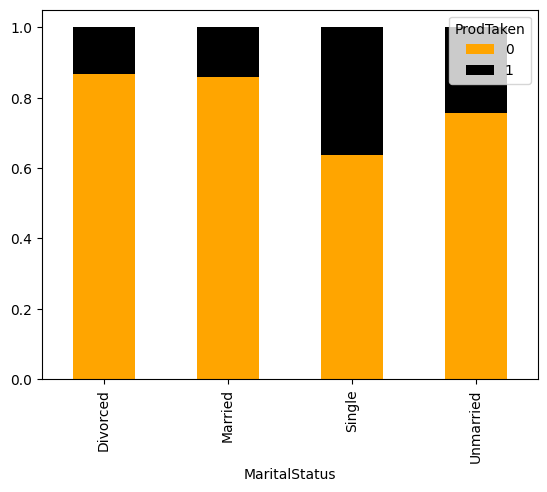

In [31]:
cross_tab.plot(kind='bar', stacked=True, color=['orange', 'black'])

In [32]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

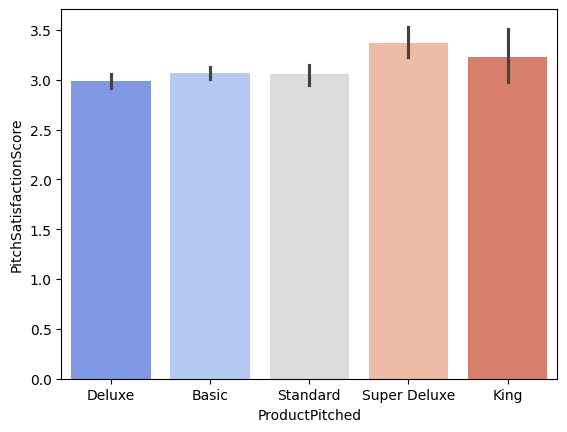

In [33]:
sns.barplot(x='ProductPitched', y='PitchSatisfactionScore', data=df, palette='coolwarm')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

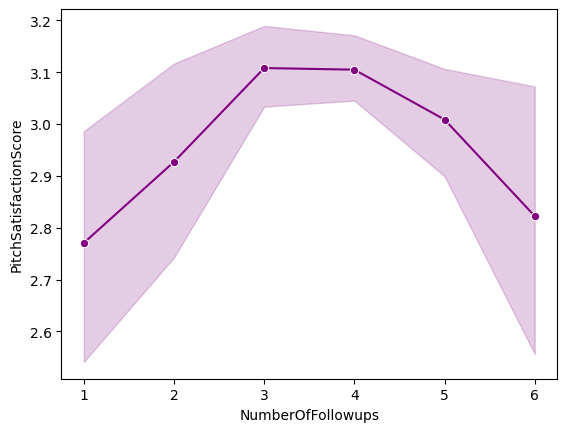

In [34]:
sns.lineplot(x='NumberOfFollowups', y='PitchSatisfactionScore', data=df, marker='o', color='purple')

<Axes: xlabel='ProdTaken', ylabel='Age'>

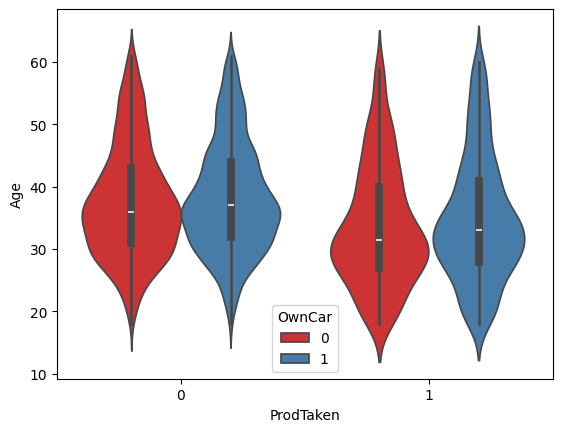

In [35]:
# multivariate analysis
sns.violinplot(x='ProdTaken', y='Age', data=df, hue='OwnCar', palette='Set1')

In [ ]:
sns.swarmplot(x="Gender", y='Age', data=df, palette='Set1', hue='ProdTaken')

In [ ]:
# 3d plots
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['MonthlyIncome'], df['DurationOfPitch'], c=df['ProdTaken'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('MonthalyIncome')
ax.set_zlabel('DurationOfPitch')
ax.set_title('3D Scatter Plot')
plt.show()

In [ ]:
numeric_cols=df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), cmap='viridis', annot=True, fmt='.3f')

In [ ]:
# feature engineering
df

In [ ]:
df.drop('CustomerID', inplace=True, axis=1)

In [ ]:
df

In [ ]:
df['TotalVisiting']=df.NumberOfChildrenVisiting + df.NumberOfPersonVisiting
df['TotalVisiting']

In [ ]:
df

In [ ]:
num_feature=[feature for feature in df.columns if df[feature].dtypes != 'object']
print("Number of Numerical Features are: ", len(num_feature))

In [ ]:
cat_feature=[feature for feature in df.columns if df[feature].dtypes == 'object']
print("Number of categorical Features are: ", len(cat_feature))
cat_feature

In [ ]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) <= 5]
print("Number of Numerical Features are: ", len(discrete_features))

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
x_